In [58]:
 #%%
import numpy as np
import scipy as scp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import plotly.express as px

In [59]:
import numpy as np

#parse data
temp_global = pd.read_csv('./data/climate/GlobalTemperatures.csv',parse_dates=[0], infer_datetime_format=True)
temp_city = pd.read_csv('./data/climate/GlobalLandTemperaturesByCity.csv',parse_dates=[0], infer_datetime_format=True)
temp_major_city = pd.read_csv('./data/climate/GlobalLandTemperaturesByMajorCity.csv',parse_dates=[0], infer_datetime_format=True)
temp_country = pd.read_csv('./data/climate/GlobalLandTemperaturesByCountry.csv',parse_dates=[0], infer_datetime_format=True)
temp_state = pd.read_csv('./data/climate/GlobalLandTemperaturesByState.csv',parse_dates=[0], infer_datetime_format=True)

# 1. Analyse Whether Global Warmings exists or not

In [60]:
temp_global.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
temp_global = pd.read_csv('./data/climate/GlobalTemperatures.csv')
temp_global.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
temp_global['dt'][0].split('-')

['1750', '01', '01']

In [63]:
def fetch_year(date):
    return date.split('-')[0]

In [64]:
temp_global['years'] = temp_global['dt'].apply(fetch_year)

In [65]:
temp_global.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [66]:
data = temp_global.groupby('years').agg({
    'LandAverageTemperature':'mean',
    'LandAverageTemperatureUncertainty':'mean'
}).reset_index()

In [67]:
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250


In [68]:
data.shape

(266, 3)

In [69]:
data['Uncertainty_top'] = data['LandAverageTemperature'] + data['LandAverageTemperatureUncertainty']
data['Uncertainty_bottom'] = data['LandAverageTemperature'] - data['LandAverageTemperatureUncertainty']

In [70]:
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainty_top,Uncertainty_bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


In [71]:
data.columns

Index(['years', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'Uncertainty_top', 'Uncertainty_bottom'],
      dtype='object')

In [127]:
fig = px.line(
    data,
    x='years',
    y=['LandAverageTemperature', 'Uncertainty_top', 'Uncertainty_bottom'],
    title='Average Land Temp in World'
)
fig.show()

NameError: name 'oxgen' is not defined

# 2. Explore Average Temperature of Each Season

In [73]:
temp_global.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [74]:
temp_global.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
years                                         object
dtype: object

In [75]:
temp_global['dt'] = pd.to_datetime((temp_global['dt']))

In [76]:
temp_global.dtypes

dt                                           datetime64[ns]
LandAverageTemperature                              float64
LandAverageTemperatureUncertainty                   float64
LandMaxTemperature                                  float64
LandMaxTemperatureUncertainty                       float64
LandMinTemperature                                  float64
LandMinTemperatureUncertainty                       float64
LandAndOceanAverageTemperature                      float64
LandAndOceanAverageTemperatureUncertainty           float64
years                                                object
dtype: object

In [77]:
temp_global['month'] = temp_global['dt'].dt.month

In [78]:
temp_global.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5


In [79]:
def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'

In [80]:
temp_global['season'] = temp_global['month'].apply(get_season)

In [81]:
temp_global.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month,season
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,winter
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,winter
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3,spring
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4,spring
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5,spring


In [82]:
temp_global['years'].unique()

array(['1750', '1751', '1752', '1753', '1754', '1755', '1756', '1757',
       '1758', '1759', '1760', '1761', '1762', '1763', '1764', '1765',
       '1766', '1767', '1768', '1769', '1770', '1771', '1772', '1773',
       '1774', '1775', '1776', '1777', '1778', '1779', '1780', '1781',
       '1782', '1783', '1784', '1785', '1786', '1787', '1788', '1789',
       '1790', '1791', '1792', '1793', '1794', '1795', '1796', '1797',
       '1798', '1799', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808', '1809', '1810', '1811', '1812', '1813',
       '1814', '1815', '1816', '1817', '1818', '1819', '1820', '1821',
       '1822', '1823', '1824', '1825', '1826', '1827', '1828', '1829',
       '1830', '1831', '1832', '1833', '1834', '1835', '1836', '1837',
       '1838', '1839', '1840', '1841', '1842', '1843', '1844', '1845',
       '1846', '1847', '1848', '1849', '1850', '1851', '1852', '1853',
       '1854', '1855', '1856', '1857', '1858', '1859', '1860', '1861',
      

In [83]:
spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

years = temp_global['years'].unique()
for year in years:
    current_df = temp_global[temp_global['years'] == year]
    spring_temps.append(current_df[current_df['season'] == 'spring']['LandAverageTemperature'].mean())
    summer_temps.append(current_df[current_df['season'] == 'summer']['LandAverageTemperature'].mean())
    autumn_temps.append(current_df[current_df['season'] == 'autumn']['LandAverageTemperature'].mean())
    winter_temps.append(current_df[current_df['season'] == 'winter']['LandAverageTemperature'].mean())

In [84]:
season = pd.DataFrame()

In [85]:
season['year'] = years
season['spring_temps'] = spring_temps
season['summer_temps'] = summer_temps
season['autum_temps'] = autumn_temps
season['winter_temps'] = winter_temps

In [86]:
season.head()

,year,spring_temps,summer_temps,autum_temps,winter_temps
0,1750,8.563000,14.518333,8.890000,2.963000
1,1751,6.735000,14.116000,10.673000,1.729000
2,1752,7.035500,NaN,7.587000,2.717000
3,1753,8.627333,14.608333,9.212333,1.104333
4,1754,9.074333,14.208333,8.957333,1.637333


In [87]:
season.columns

Index(['year', 'spring_temps', 'summer_temps', 'autum_temps', 'winter_temps'], dtype='object')

In [88]:
fig= px.line(
    data_frame=season,
    x='year',
    y=['spring_temps', 'summer_temps', 'autum_temps', 'winter_temps'],
    title='Avg Temp in Each Season'
)
fig.show()

# 3. Perform Data-Preprocessing on Your Data and Make it ready Time Series Analysis

In [89]:
temp_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [90]:
temp_city.shape

(8461263, 7)

In [91]:
temp_city.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

In [92]:
usa = temp_city[temp_city['Country'] == 'United States']

In [93]:
usa.shape

(687289, 7)

In [94]:
data = ['New York', 'Los Angeles', 'San Francisco']
usa['City'].isin(data)

47555      False
47556      False
47557      False
47558      False
47559      False
           ...  
8439242    False
8439243    False
8439244    False
8439245    False
8439246    False
Name: City, Length: 687289, dtype: bool

In [95]:
data2 = usa[usa['City'].isin(data)]

In [96]:
data2.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
4356748,1849-01-01,8.819,2.558,Los Angeles,United States,34.56N,118.70W
4356749,1849-02-01,9.577,1.970,Los Angeles,United States,34.56N,118.70W
4356750,1849-03-01,11.814,2.173,Los Angeles,United States,34.56N,118.70W
4356751,1849-04-01,13.704,2.902,Los Angeles,United States,34.56N,118.70W
4356752,1849-05-01,14.834,2.017,Los Angeles,United States,34.56N,118.70W


In [97]:
data2 = data2[['dt', 'AverageTemperature']]

In [98]:
data2.head()

,dt,AverageTemperature
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834


In [99]:
data2.columns = ['Date', 'Temp']

In [100]:
data2.head()

,Date,Temp
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834


In [101]:
data2.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

In [102]:
data2['Date'] = pd.to_datetime((data2['Date']))

In [103]:
data2.head()

,Date,Temp
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834


In [104]:
data2.isna().sum()

Date      0
Temp    120
dtype: int64

In [105]:
data2.dropna(inplace=True)

In [106]:
data2.shape

(7073, 2)

In [107]:
data2.set_index('Date', inplace=True)

In [108]:
data2.head()

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834


# 4. How to check Wether Data is stationary or not

/Users/mzalaya/anaconda3/envs/torch/lib/python3.11/site-packages/seaborn/_core.py:1057: FutureWarning:

reindexing with a non-unique Index is deprecated and will raise in a future version.



ValueError: cannot reindex on an axis with duplicate labels

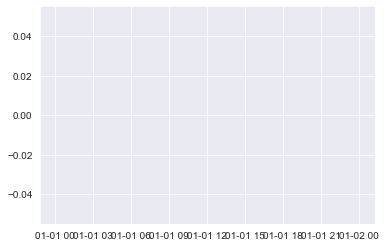

In [109]:
sns.lineplot(x=data2.index, y=data2['Temp'])
plt.show()

In [110]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

In [56]:
test_result = adfuller(data2['Temp'])
# my data is not stationary p_values < 5%

In [111]:
def adfuller_test(Temp):
    result = adfuller(data2['Temp'])
    labels = ['ADF Test Statistics', 'p-value', '#lags used', 'Number of observations used']

    for value, label in zip(result, labels):
        print(label + ':' + str(value))
    if result[1] < 0.05:
        print('Strong evidence against the null hypothesis, reject the null hypothesis, data has unit root and is stationary')
    else:
        print('weak evidence against the null hypothesis, accept the null hypothesis, data has no unit root and non stationary')

In [112]:
adfuller_test(data2['Temp'])

ADF Test Statistics:-2.00638930367572
p-value:0.2837786583333589
#lags used:35
Number of observations used:7037
weak evidence against the null hypothesis, accept the null hypothesis, data has no unit root and non stationary


In [113]:
df = data2.copy()

In [114]:
df.head()

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834


In [115]:
df['first_temp_diff'] = df['Temp'] - df['Temp'].shift(12)

In [116]:
df.head(20)

,Temp,first_temp_diff
Date,,
1849-01-01,8.819,NaN
1849-02-01,9.577,NaN
1849-03-01,11.814,NaN
1849-04-01,13.704,NaN
1849-05-01,14.834,NaN
1849-06-01,21.173,NaN
1849-07-01,26.159,NaN
1849-08-01,26.099,NaN
1849-09-01,21.848,NaN


In [117]:
adfuller_test(df['first_temp_diff'].dropna())

ADF Test Statistics:-2.00638930367572
p-value:0.2837786583333589
#lags used:35
Number of observations used:7037
weak evidence against the null hypothesis, accept the null hypothesis, data has no unit root and non stationary


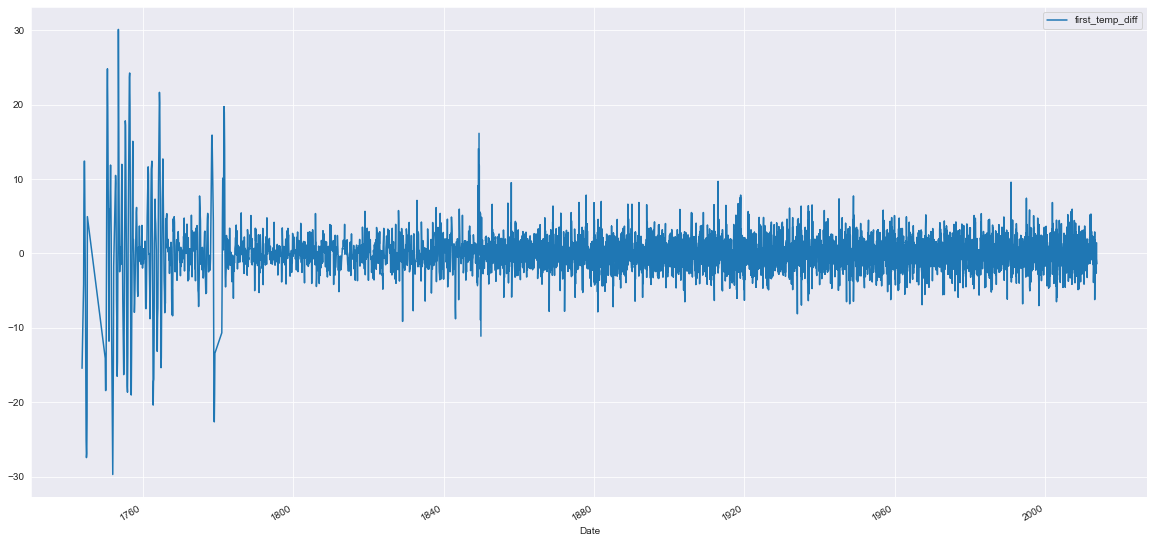

In [118]:
df[['first_temp_diff']].plot(figsize=(20, 10))
plt.show()

# 5. Examine Seasonality

In [119]:
data2.head()

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834


In [120]:
data2['month'] = data2.index.month

In [121]:
data2['year'] = data2.index.year

In [122]:
data2.head()

,Temp,month,year
Date,,,
1849-01-01,8.819,1,1849
1849-02-01,9.577,2,1849
1849-03-01,11.814,3,1849
1849-04-01,13.704,4,1849
1849-05-01,14.834,5,1849


In [123]:
pivot = data2.pivot_table(values='Temp', index='month', columns='year')

In [124]:
pivot

year,1743,1744,1745,1750,1751,1752,1753,1754,1755,1756,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
month,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,-2.363,-4.310,-3.591,-7.588,-3.122,-2.252,-3.193,-1.985,...,4.080333,4.923000,7.135333,5.656000,5.216333,5.550333,5.776667,5.109333,7.177667,5.388333
2,NaN,NaN,-2.671,-2.719,-2.051,NaN,-1.467,-2.583,-1.802,0.259,...,6.100000,7.297000,7.547667,5.634000,6.754333,6.540667,6.788000,5.777333,7.970000,6.222667
3,NaN,NaN,1.363,2.773,3.256,3.322,4.207,2.728,1.112,NaN,...,12.184000,9.124667,7.527333,10.586000,9.733667,9.211000,10.486667,9.115000,10.604333,10.162333
4,NaN,9.788,8.209,8.848,7.992,7.402,8.099,NaN,8.714,NaN,...,13.806333,12.546000,12.051667,12.342000,13.113000,12.744000,12.254000,12.710000,13.075000,13.880000
5,NaN,15.708,NaN,15.411,NaN,NaN,15.330,NaN,15.238,NaN,...,17.817333,15.982333,17.123333,17.150000,15.800333,17.565667,15.856333,15.724000,17.670333,17.335333
6,NaN,21.210,NaN,19.017,20.724,NaN,20.820,20.075,19.964,20.488,...,19.872000,19.775333,21.395333,20.514333,21.474667,18.941667,20.436667,19.305000,19.904333,21.028333
7,NaN,22.207,NaN,24.203,22.668,NaN,22.524,22.503,NaN,22.452,...,22.246333,23.611667,24.655333,22.628333,23.020000,22.247667,22.538667,22.733333,22.654000,23.489667
8,NaN,NaN,NaN,22.135,21.547,NaN,21.324,21.461,NaN,21.208,...,22.101333,23.028333,21.920333,22.690000,22.305333,22.578000,21.665333,22.028667,23.384667,21.654667
9,NaN,14.922,NaN,17.445,15.812,NaN,15.548,16.281,16.137,17.345,...,20.669333,19.427667,19.365333,19.559000,20.686667,20.752667,20.537333,20.856333,20.655667,20.393333


<Axes: xlabel='month'>

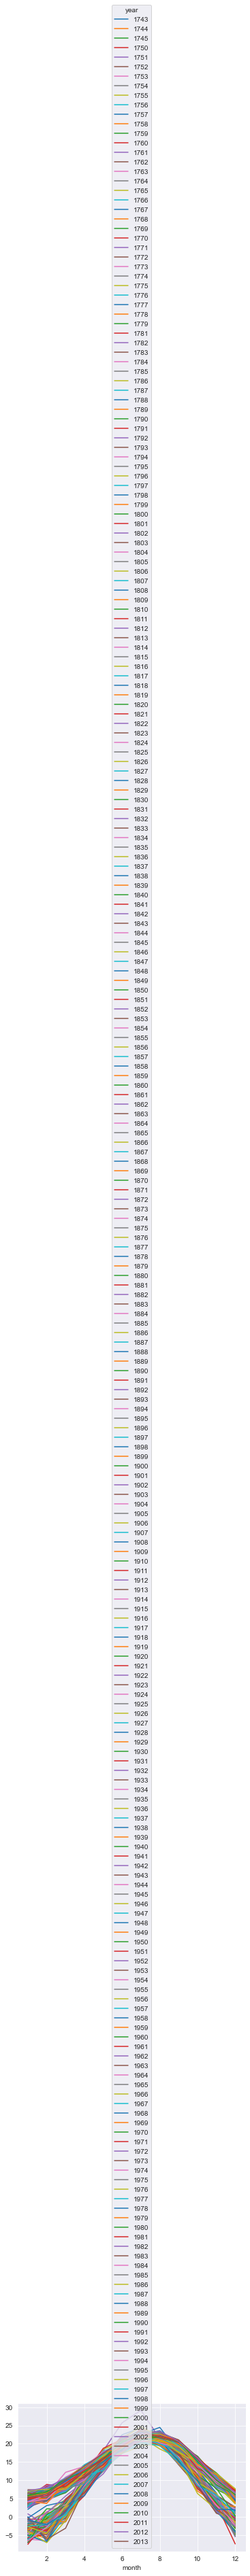

In [125]:
pivot.plot()

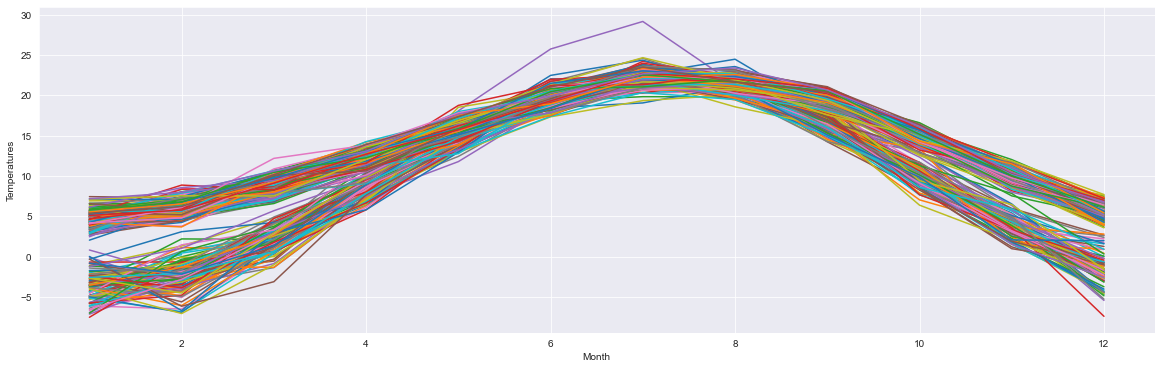

In [126]:
pivot.plot(figsize=(20, 6))
plt.legend().remove()
plt.xlabel('Month')
plt.ylabel('Temperatures')
plt.show()

In [235]:
monthly_seasonality = pivot.mean(axis=1)

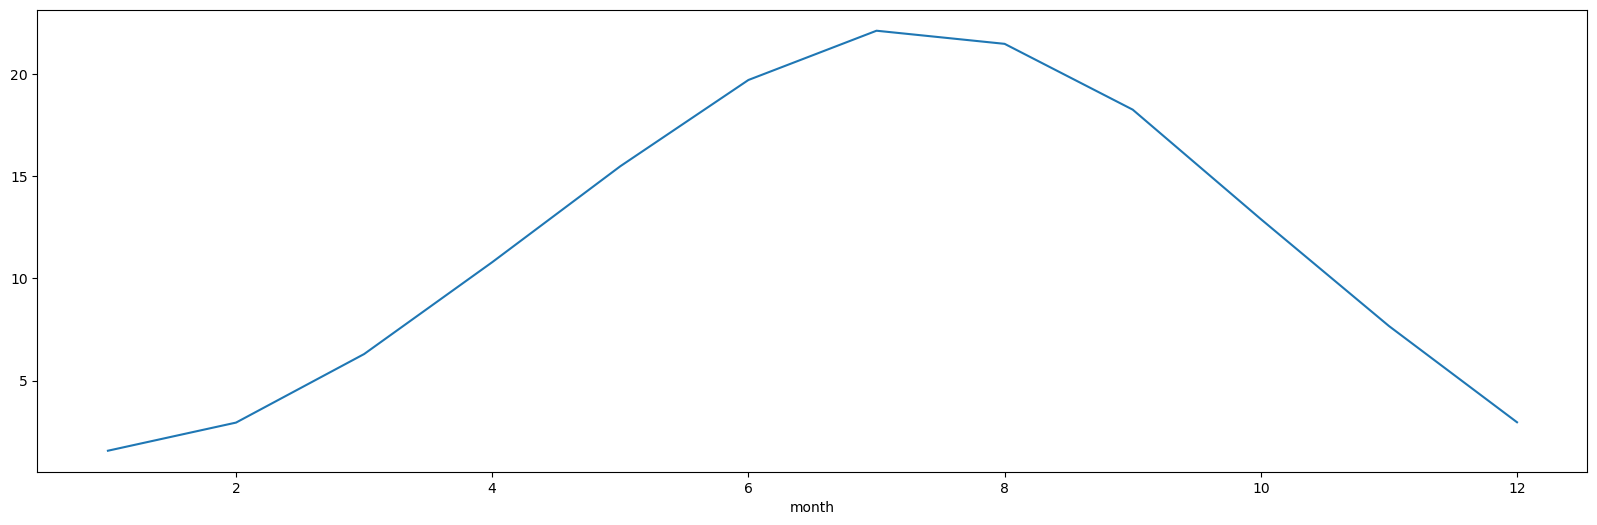

In [237]:
monthly_seasonality.plot(figsize=(20,6))
plt.show()

# 6. Build Time Series Model using Moving Average


In [238]:
df.head()

,Temp,first_temp_diff
Date,,
1849-01-01,8.819,NaN
1849-02-01,9.577,NaN
1849-03-01,11.814,NaN
1849-04-01,13.704,NaN
1849-05-01,14.834,NaN


In [239]:
df = df[['first_temp_diff']]

In [240]:
df.head()

,first_temp_diff
Date,
1849-01-01,NaN
1849-02-01,NaN
1849-03-01,NaN
1849-04-01,NaN
1849-05-01,NaN


In [241]:
df.dropna(inplace=True)
df.head()

/var/folders/nn/3q6_mtc50k76l9qmq8wsp4780000gn/T/ipykernel_92695/3523028469.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,first_temp_diff
Date,
1850-01-01,-1.732
1850-02-01,-1.002
1850-03-01,-1.449
1850-04-01,0.031
1850-05-01,1.799


In [242]:
df.shape

(7061, 1)

In [244]:
df['first_temp_diff'].rolling(window=5).mean()

Date
1850-01-01       NaN
1850-02-01       NaN
1850-03-01       NaN
1850-04-01       NaN
1850-05-01   -0.4706
               ...  
2013-05-01    0.4336
2013-06-01    1.0236
2013-07-01    1.4060
2013-08-01    0.8454
2013-09-01    0.7614
Name: first_temp_diff, Length: 7061, dtype: float64

In [245]:
df['first_temp_diff'].rolling(window=5).max()

Date
1850-01-01      NaN
1850-02-01      NaN
1850-03-01      NaN
1850-04-01      NaN
1850-05-01    1.799
              ...  
2013-05-01    2.003
2013-06-01    2.003
2013-07-01    2.003
2013-08-01    1.846
2013-09-01    1.426
Name: first_temp_diff, Length: 7061, dtype: float64

In [247]:
value = pd.DataFrame(df['first_temp_diff'])

In [248]:
temp_df = pd.concat([value, df['first_temp_diff'].rolling(window=5).mean()], axis=1)

In [249]:
temp_df.columns = ['actual_temp', 'forecast_temp']

In [250]:
temp_df.head()

,actual_temp,forecast_temp
Date,,
1850-01-01,-1.732,NaN
1850-02-01,-1.002,NaN
1850-03-01,-1.449,NaN
1850-04-01,0.031,NaN
1850-05-01,1.799,-0.4706


In [251]:
from sklearn.metrics import mean_squared_error

In [253]:
np.sqrt(mean_squared_error(temp_df['forecast_temp'][4:], temp_df['actual_temp'][4:]))

2.3934235122562058

# 7. Intuition behind ARIMA (part 1)

AR + I + MA

Autoregressive Model + INtegrated + Moving Average  (p, d, q)
ARIMA - > (p, d, q)

PACF: Partial Auto Correlation Factor ===> p
Differenciation ==> d
ACF ===> q